In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
np.random.seed(42)

In [56]:
n_samples = 200

In [57]:
age = np.random.randint(18, 60, n_samples)  # Age feature
income = np.random.randint(20000, 100000, n_samples)  # Income feature

X = np.c_[age, income]  
y = (age + income / 1000 + np.random.randn(n_samples) * 10 > 80).astype(int) 

In [58]:
data = pd.DataFrame({'Age': age, 'Income': income, 'Class': y})

In [59]:
data.head()

,Age,Income,Class
0,56,45342,1
1,46,57157,1
2,32,87863,1
3,25,72083,1
4,38,85733,1


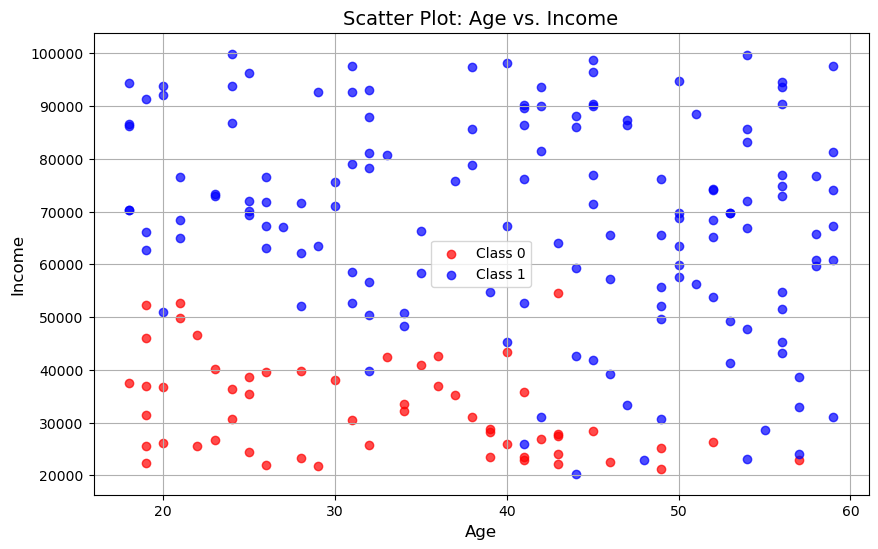

In [60]:
plt.figure(figsize=(10, 6))
for label, color in zip([0, 1], ['red', 'blue']):
    plt.scatter(data[data['Class'] == label]['Age'], 
                data[data['Class'] == label]['Income'], 
                c=color, label=f'Class {label}', alpha=0.7)
plt.title('Scatter Plot: Age vs. Income', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [61]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X = np.c_[np.ones(X.shape[0]), X]

In [62]:
train_size = int(0.8 * n_samples)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [63]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [64]:
def loss_fn(X, y, beta):
    m = len(y)
    z = X @ beta
    predictions = sigmoid(z)
    loss = -(1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return loss

In [65]:
def log_reg(X, y, beta, learning_rate, num_iterations):
    m = len(y)
    for i in range(num_iterations):
        z = X @ beta
        predictions = sigmoid(z)
        gradient = (1 / m) * (X.T @ (predictions - y))
        beta -= learning_rate * gradient
        if i % 1000 == 0:
            loss = loss_fn(X, y, beta)
            print(f"Iteration {i}: loss {loss}")
    return beta


In [66]:
beta = np.zeros(X_train.shape[1])  
learning_rate = 0.01
num_iterations = 10000

In [67]:
beta = log_reg(X_train, y_train, beta, learning_rate, num_iterations)

Iteration 0: loss 0.6916007638551694
Iteration 1000: loss 0.29847809175043033
Iteration 2000: loss 0.2446018907107475
Iteration 3000: loss 0.22188547592908092
Iteration 4000: loss 0.20906676067665814
Iteration 5000: loss 0.20077537725769115
Iteration 6000: loss 0.19496747998706132
Iteration 7000: loss 0.1906805482891541
Iteration 8000: loss 0.18739683459019468
Iteration 9000: loss 0.18481114772455648


In [68]:
def predict(X, beta, threshold=0.5):
    probabilities = sigmoid(X @ beta)
    return (probabilities >= threshold).astype(int)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [69]:
y_pred_train = predict(X_train, beta)
y_pred_test = predict(X_test, beta)

In [70]:
test_accuracy = accuracy(y_test, y_pred_test)

print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Testing Accuracy: 95.00%
